In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-tweets/covid19_tweets.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
tweet_data = pd.read_csv('/kaggle/input/covid19-tweets/covid19_tweets.csv')
tweet_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102601 entries, 0 to 102600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         102601 non-null  object
 1   user_location     81775 non-null   object
 2   user_description  96813 non-null   object
 3   user_created      102601 non-null  object
 4   user_followers    102601 non-null  int64 
 5   user_friends      102601 non-null  int64 
 6   user_favourites   102601 non-null  int64 
 7   user_verified     102601 non-null  bool  
 8   date              102601 non-null  object
 9   text              102601 non-null  object
 10  hashtags          73065 non-null   object
 11  source            102574 non-null  object
 12  is_retweet        102601 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 8.8+ MB


In [5]:
tweet_data.isna().sum()

user_name               0
user_location       20826
user_description     5788
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            29536
source                 27
is_retweet              0
dtype: int64

In [6]:
tweet_data.isna().count()

user_name           102601
user_location       102601
user_description    102601
user_created        102601
user_followers      102601
user_friends        102601
user_favourites     102601
user_verified       102601
date                102601
text                102601
hashtags            102601
source              102601
is_retweet          102601
dtype: int64

In [7]:
def missing_data(data):
    """this function handles the missing data percenatge wise and unique values as well in tabular form"""
    total_count = tweet_data.isna().count()
    total_nulls = tweet_data.isnull().sum()
    percent_nulls = (tweet_data.isnull().sum()/tweet_data.isnull().count()*100)
    tb = pd.concat([ total_count, total_nulls, percent_nulls], axis=1, keys=[' total_count','Total nulls', 'null Percent'])
    types = []
    uni_vals = []
    for col in tweet_data.columns:
        dtype = str(tweet_data[col].dtype)
        uniques = tweet_data[col].nunique()
        types.append(dtype)
        uni_vals.append(uniques)
    tb['Types'] = types
    tb['Unique values'] = uni_vals
    return tb

In [8]:
missing_data(tweet_data)

,total_count,Total nulls,null Percent,Types,Unique values
user_name,102601,0,0.000000,object,59510
user_location,102601,20826,20.298048,object,18570
user_description,102601,5788,5.641271,object,56929
user_created,102601,0,0.000000,object,60432
user_followers,102601,0,0.000000,int64,19523
user_friends,102601,0,0.000000,int64,8806
user_favourites,102601,0,0.000000,int64,25760
user_verified,102601,0,0.000000,bool,2
date,102601,0,0.000000,object,76322
text,102601,0,0.000000,object,102408


In [9]:
def get_countplot(tweet_data):
    """this function handles the top 10 user specifications"""
    user_cols = ['user_name', 'user_location', 'source']
    for col in user_cols:
        tweet_data[col].value_counts().head(10).plot(kind = 'bar', figsize = (15,5))
        plt.show()


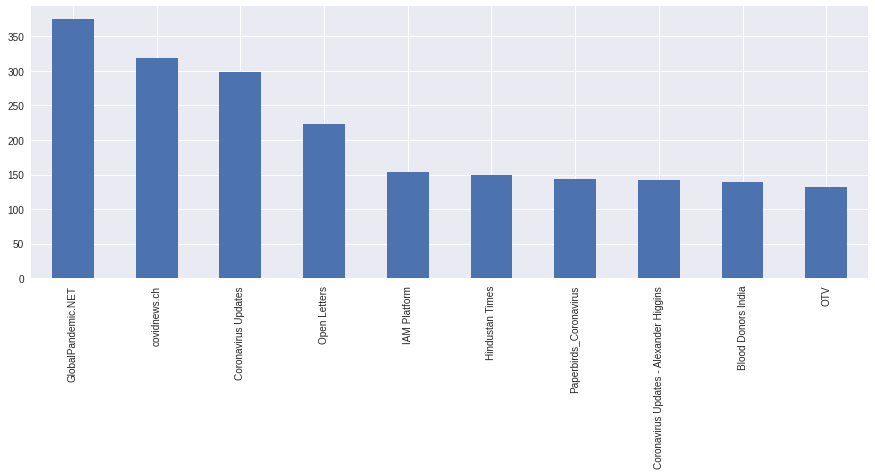

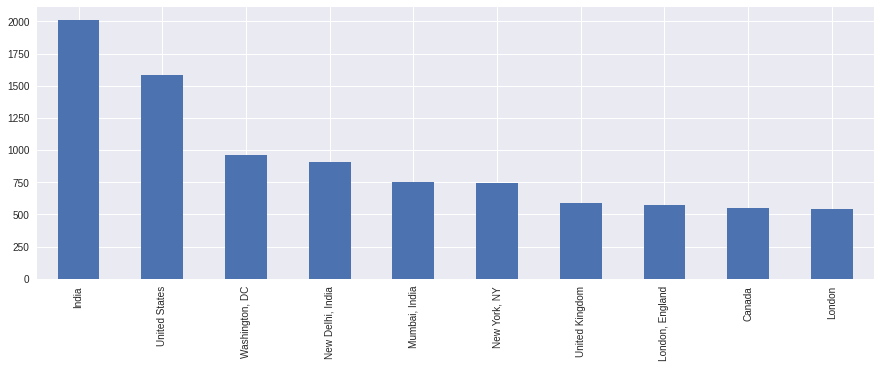

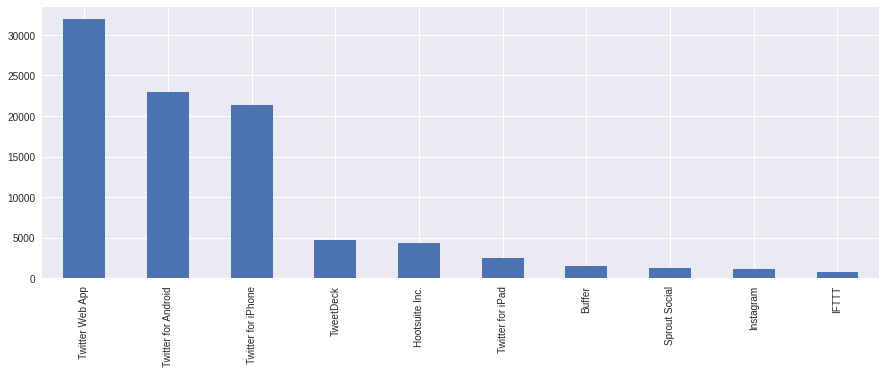

In [10]:
get_countplot(tweet_data)

In [11]:
tweet_data['text'].head()

0    If I smelled the scent of hand sanitizers toda...
1    Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2    @diane3443 @wdunlap @realDonaldTrump Trump nev...
3    @brookbanktv The one gift #COVID19 has give me...
4    25 July : Media Bulletin on Novel #CoronaVirus...
Name: text, dtype: object

### we must clean the data in order to go for wordcloud

In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
corpus = []
ps = PorterStemmer()

for i in range(0, tweet_data.shape[0]):
    text = re.sub(pattern= '^[a-zA-Z]', repl= ' ', string= tweet_data['text'][i])
    text = re.sub(r"http\S+", "", text)
    text = text.lower()
    text = text.split()
    words = [ word for word in text if word not in set(stopwords.words('english'))]
    stem_words = [ps.stem(st_words) for st_words in words]
    final_words = ' '.join(stem_words)
    corpus.append(final_words)

In [14]:
corpus[:10]

['f smell scent hand sanit today someon past, would think intox that…',
 'ey @yanke @yankeespr @mlb - made sens player pay respect a…',
 '@diane3443 @wdunlap @realdonaldtrump trump never claim #covid19 hoax. claim effort to…',
 '@brookbanktv one gift #covid19 give appreci simpl thing alway around me…',
 '25 juli : media bulletin novel #coronavirusupd #covid19 @kansalrohit69 @drsyedsehrish @airnewsalert @ani…',
 '#coronaviru #covid19 death continu rise. almost bad ever was. politician busi want…',
 'ow #covid19 chang work gener (and recruiting, specifically) via/ @proactivetal #recruiting…',
 'ou wear face cover shop - includ visit local commun pharmacy…',
 'ray good health recoveri @chouhanshivraj . #covid19 #covidposit',
 'ope god - prophet sadhu sundar selvaraj. watch #hurricanehanna #covid19…']

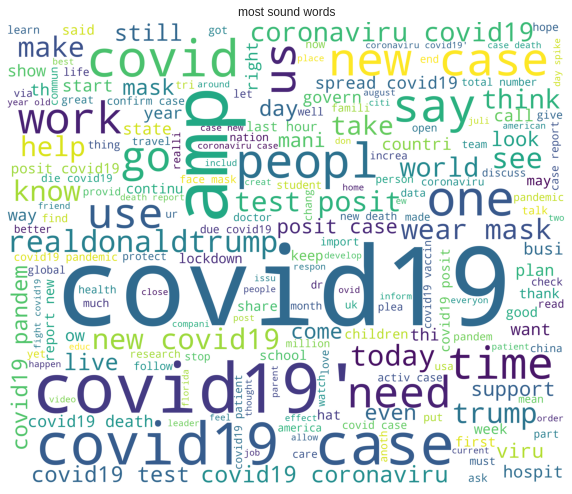

In [15]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white', width=3000, height=2500).generate(str(corpus))
plt.figure(figsize=(10,10))
plt.title('most sound words')
plt.imshow(wc)
plt.axis('off')
plt.show()

### Time analysis on tweets

In [16]:
tweet_data['date'].head() # it is object data type so convert them into datetime

0    2020-07-25 12:27:21
1    2020-07-25 12:27:17
2    2020-07-25 12:27:14
3    2020-07-25 12:27:10
4    2020-07-25 12:27:08
Name: date, dtype: object

In [18]:
tweet_data['new_date'] = pd.to_datetime(tweet_data['date'])
tweet_data['new_date'].head()

0   2020-07-25 12:27:21
1   2020-07-25 12:27:17
2   2020-07-25 12:27:14
3   2020-07-25 12:27:10
4   2020-07-25 12:27:08
Name: new_date, dtype: datetime64[ns]

In [19]:
# create more columns on datetime so that we can analyse it
tweet_data['year'] = tweet_data['new_date'].dt.year
tweet_data['month'] = tweet_data['new_date'].dt.month
tweet_data['day'] = tweet_data['new_date'].dt.day
tweet_data['dayofweek'] = tweet_data['new_date'].dt.dayofweek
tweet_data['hour'] = tweet_data['new_date'].dt.hour
tweet_data['minute'] = tweet_data['new_date'].dt.minute
tweet_data['dayofyear'] = tweet_data['new_date'].dt.dayofyear
tweet_data['date_only'] = tweet_data['new_date'].dt.date

In [31]:
# consider only datetime parts columns
cols1 = ['text', 'year', 'month', 'day', 'dayofweek',
       'hour', 'minute', 'dayofyear', 'date_only']

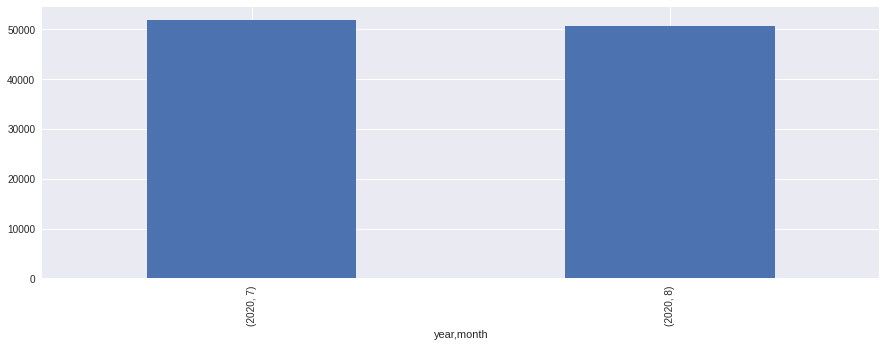

In [37]:
tweet_data.groupby(['year', 'month'])['text'].count().plot(kind = 'bar', figsize = (15,5))
plt.show()

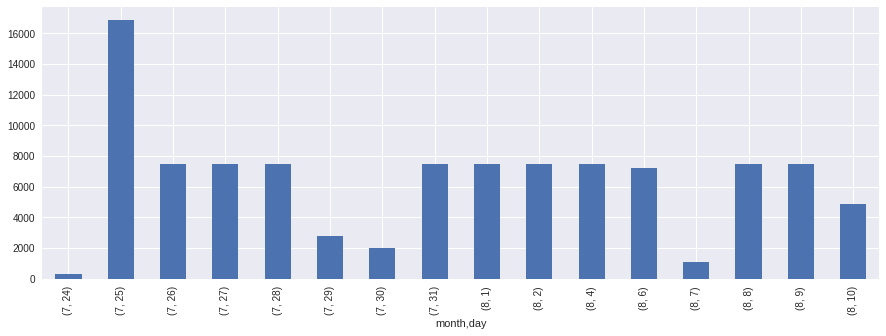

In [40]:
tweet_data.groupby( ['month', 'day'])['text'].count().plot(kind = 'bar', figsize = (15,5))
plt.show()

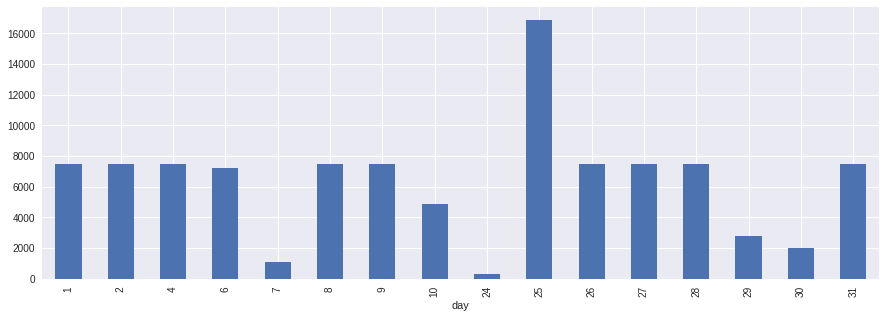

In [41]:
tweet_data.groupby( ['day'])['text'].count().plot(kind = 'bar', figsize = (15,5))
plt.show()

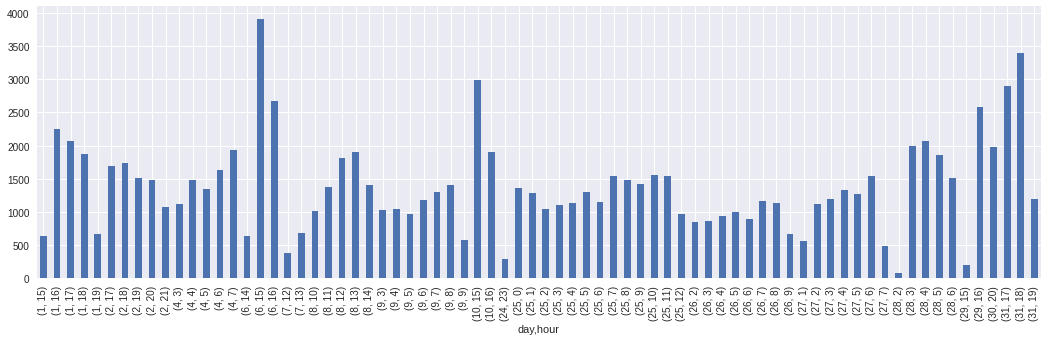

In [44]:
tweet_data.groupby( ['day', 'hour'])['text'].count().plot(kind = 'bar', figsize = (18,5))
plt.show()